# Imports and Constraints

In [13]:
# Import pandas package  
import pandas as pd 
   
# Define a dictionary containing Students data 
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'], 
        'Height': [5.1, 6.2, 5.1, 5.2], 
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']} 
   
   
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data) 
  
# Using 'Address' as the column name and equating it to the list 
df2 = df.assign(address = 1) 
   
# Observe the result 
df2 

,Name,Height,Qualification,address
0,Jai,5.1,Msc,1
1,Princi,6.2,MA,1
2,Gaurav,5.1,Msc,1
3,Anuj,5.2,Msc,1


# Defines

In [400]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from collections import Counter
import category_encoders as ce
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator


def load_data() -> pd.Series:
    csv_train = pd.read_csv('train.txt', sep=" ").assign(train = 1) 
    csv_test = pd.read_csv('testx.txt', sep=" ").assign(train = 0)
    csv = pd.concat([csv_train,csv_test])
    classes = csv['class']
    csv = csv.drop(['class'], axis=1)
#     print(f"class0: {percentage0}%,\tclass1: {percentage1}%")
    return csv, classes

def del_nans(nans_perc):
    # Find those where nans is over nans_perc
    global csv, nans
    na = csv.isna().sum()
    del_na = na[na >= nans_perc*len(csv)]
    csv = csv.drop(del_na.index.values, axis=1)
    nans = nans_ctr()
    
def nans_ctr() -> pd.Series:
    return csv.isna().sum()

def unique_ctr() -> pd.Series():
    unique = pd.Series()
    for col in list(csv_org):
    #     len(csv[col].unique().astype(int))
    #     print(f"col {col}\t unique: {len(csv[col].unique())}")
        if(csv.columns.contains(col) and (col != 'train')):
            unique.at[col] = len(csv[col].unique())
#     print(unique.head(5))
    return unique
def val_types() -> pd.Series():
    val_type = pd.Series()
    for col in list(csv_org):
        if not csv.columns.contains(col) or col == 'train':
            continue
        if csv[col].dtype == np.float64:
            val_type.at[col] = np.float64
        elif csv[col].dtype == np.int64:
            val_type.at[col] = np.int64
        elif csv[col].dtype == np.int32:
            val_type.at[col] = np.int32
        elif csv[col].dtype == object:
            val_type.at[col] = object
        else:
            print(f"No common value type found in val_types() - {csv[col].dtype}")
#     print(f"float: {sum(val_type == np.float64)}")
#     print(f"int: {sum(val_type == np.int64)}")
#     print(f"string: {sum(val_type == object)}")
    return val_type
def stat(f):
    nans = nans_ctr()
    unique = unique_ctr()
    val_type = val_types()
    print(f"min: {csv[f].min()}")
    print(f"max: {csv[f].max()}")
    print(f"nans: {nans[f]}")
    print(f"unique: {unique[f]}")
    print(f"val_type: {val_type[f]}")
    print(f"vals per class: {round((len(csv)-nans[f])/unique[f],2)}")
    
def plot(data, sort=False, log=True, small=False):
    if small:
        figsize = (8,4)
    else:
        figsize = (20,10)
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    if sort:
        ax = df.sort_values(by=0, ascending=False).plot(kind='bar', logy = log, figsize=figsize, legend=False)
    else:
        ax = df.plot(kind='bar', logy = log, figsize=figsize, legend=False)
    plt.xticks(fontsize=7, rotation=90)
    plt.show()
    
def threshold_factorization(data, *t_list) -> pd.Series():
    letter_counts = Counter(data)
    df = pd.DataFrame.from_dict(letter_counts, orient='index')
    df = df.sort_values(by=0, ascending=False)
    t_list = (df.values[0].item()+1,) + t_list + (0,)
    out = data.copy()
#     print(f"all labels: {len(letter_counts)}")
    for i in tqdm(range(1,len(t_list)),desc="Progress",leave=False):
        idx = df[(df>t_list[i]).values & (df<=t_list[i-1]).values].index
#         print(f"labels in range ({t_list[i]}, {t_list[i-1]}): {len(idx)}")
        for j in tqdm(idx,leave=False):
            out.loc[out == j] = i
    return out

def factorize(data) -> pd.Series():
#     series = data.fillna(-1)
    series = data.copy()
    labels, _ = pd.factorize(series)
    series = labels[:len(series)]
    return series

def cast(data, lower_t, upper_t) -> pd.Series():
#     print(f"Casting with max , min = ({lower_t},{upper_t})")
    data = data.sort_values()
    data[data<lower_t] = lower_t
    data[data>upper_t] = upper_t
    return data

def standarize(df) ->pd.Series():
    return round((df-df.min())/(df.max()-df.min()),4)

def one_hot_encoding(f):
    global csv
    ohe = ce.OneHotEncoder(cols = [f], handle_unknown='ignore', use_cat_names=True)
    csv[f] = csv[f].fillna(-1)
    new_features = ohe.fit_transform(csv[f].to_frame())
    csv = csv.drop([f],axis=1)
    csv = pd.concat([csv,new_features],axis=1)
    
def binary_encoding(f):
    global csv
    ohe = ce.BinaryEncoder(cols = [f], handle_unknown='ignore',drop_invariant=True)
    csv[f] = csv[f].fillna(-1)
    new_features = ohe.fit_transform(csv[f].to_frame())
    csv = csv.drop([f],axis=1)
    csv = pd.concat([csv,new_features],axis=1)  

# Template

In [25]:
f = 'Var'
csv[f] = csv_org[f]
# csv[f] = csv[f].fillna(method='ffill')
# csv[f] = csv[f].fillna(method='bfill')
# csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
stat(f)
# csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
# csv[f] = threshold_factorization(csv[f],1000,100,1)
# csv[f] = standarize(csv[f])
# csv[f] = factorize(csv[f])
# plot(csv[f].sort_values(),small=True)
# one_hot_encoding(f)

KeyError: 'Var'

# Data Cleaning

In [260]:
csv,classes = load_data()
nans = nans_ctr()
unique = unique_ctr()
val_type = val_types()
print(max(nans))
del_nans(0.99)
print(max(nans))
print(len(csv.columns))
csv_org = csv.copy()

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


50000
49442
207


# Data Preprocessing

In [ ]:
f = 'Var57'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f],small=True)

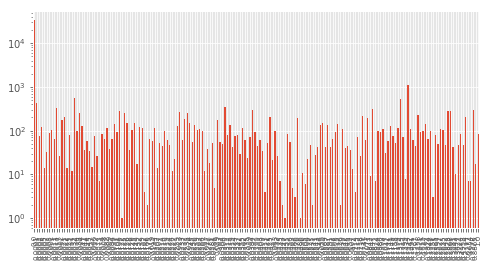

In [417]:
f = 'Var56'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

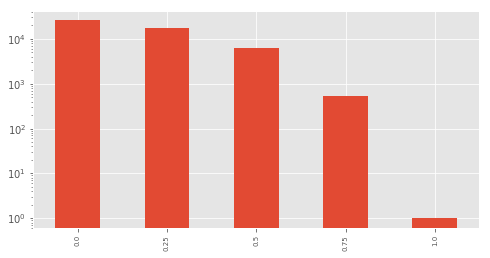

In [416]:
f = 'Var54'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

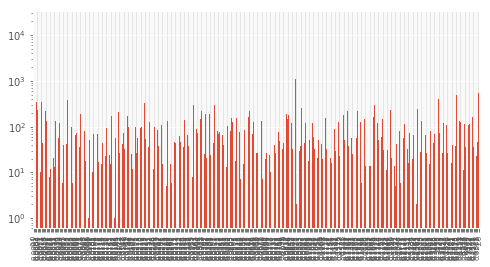

In [410]:
f = 'Var53'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

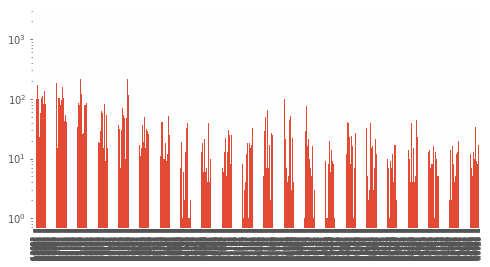

In [408]:
f = 'Var51'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

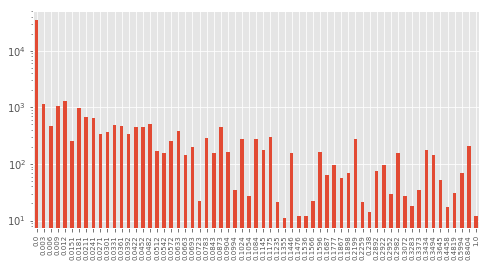

In [406]:
f = 'Var50'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

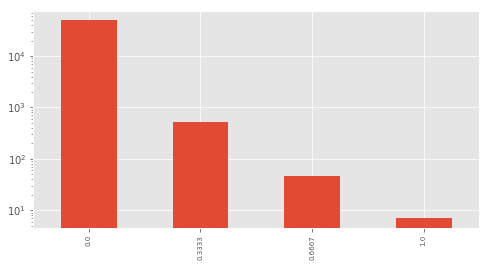

In [405]:
f = 'Var49'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

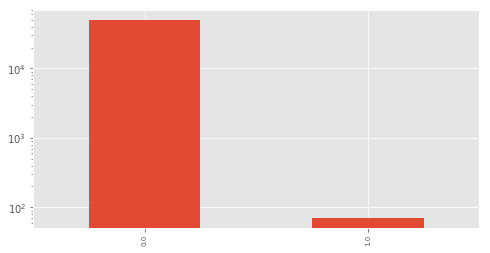

In [404]:
f = 'Var47'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],100)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

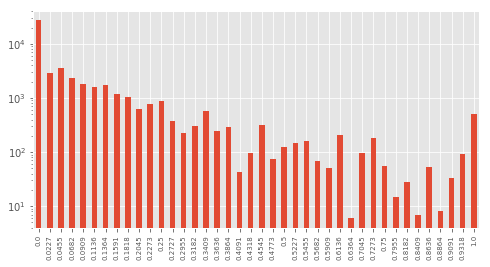

In [391]:
f = 'Var46'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

In [392]:
f = 'Var44'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

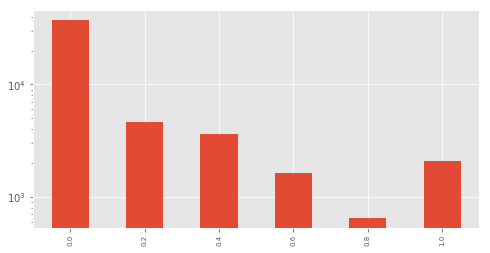

In [385]:
f = 'Var43'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.96))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

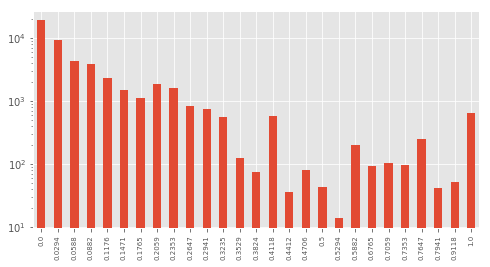

In [382]:
f = 'Var41'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

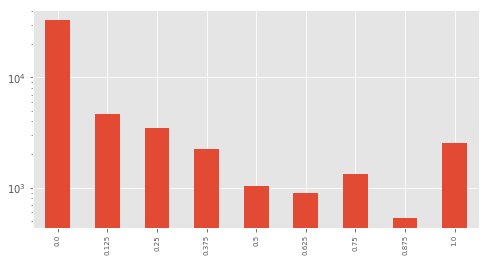

In [379]:
f = 'Var40'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.95))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

In [376]:
f = 'Var38'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

min: 0.0
max: 11635020.0
nans: 48421
unique: 551
val_type: <class 'numpy.float64'>
vals per class: 2.87


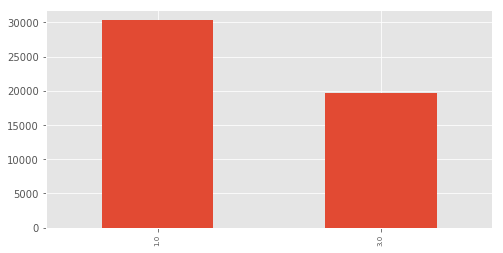

In [373]:
f = 'Var37'
csv[f] = csv_org[f]
stat(f)
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],9000,6000)
plot(csv[f].sort_values(),log=False,small=True)
one_hot_encoding(f)

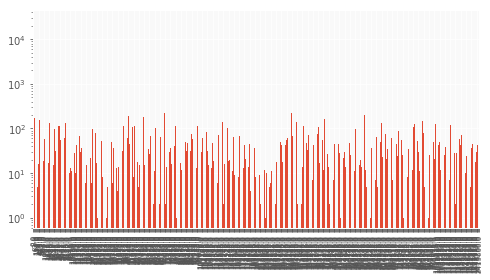

In [350]:
f = 'Var36'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
# csv[f] = threshold_factorization(csv[f],20,3,1)
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

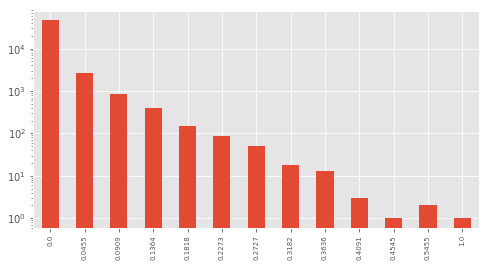

In [341]:
f = 'Var35'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

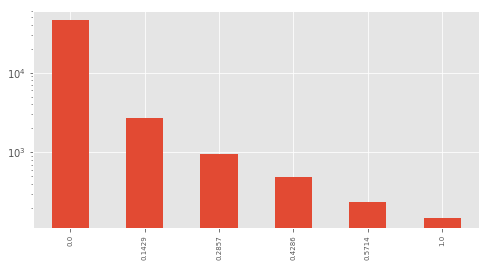

In [340]:
f = 'Var34'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

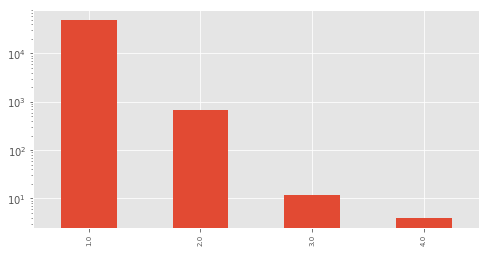

In [346]:
f = 'Var33'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],20,3,1)
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

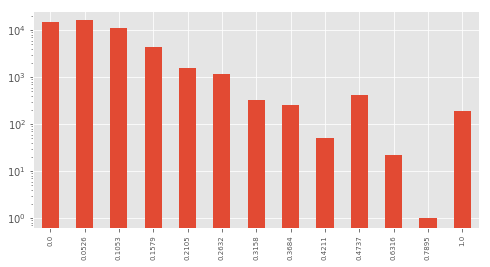

In [336]:
f = 'Var30'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

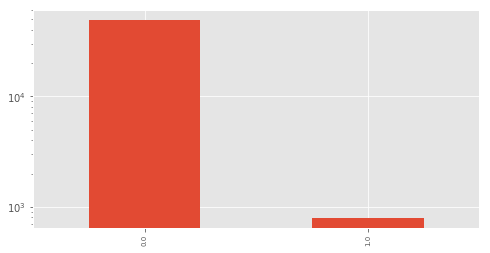

In [335]:
f = 'Var29'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: -66.88
max: 5158.56
nans: 0
unique: 4167
val_type: <class 'numpy.float64'>
vals per class: 12.0


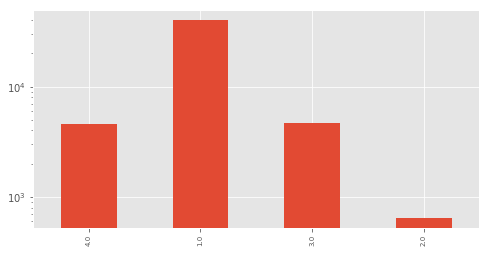

In [332]:
f = 'Var28'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = threshold_factorization(csv[f],9,8,3)
plot(csv[f],small=True)
one_hot_encoding(f)

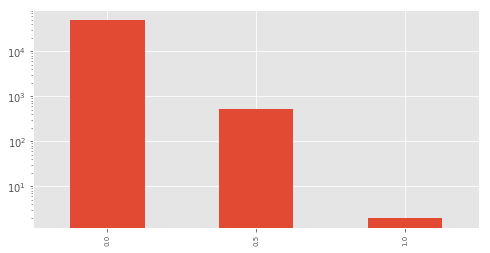

In [308]:
f = 'Var27'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)


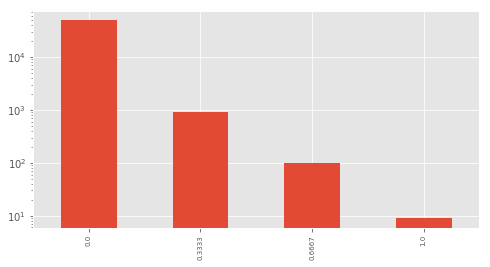

In [307]:
f = 'Var26'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)


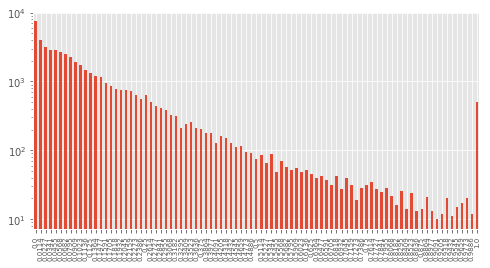

In [305]:
f = 'Var25'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.99))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)


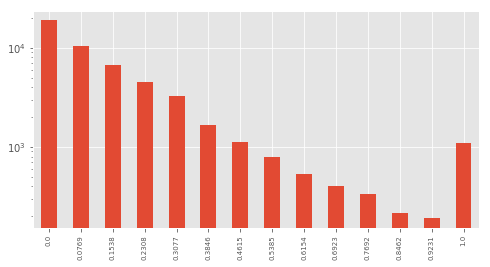

In [301]:
f = 'Var24'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

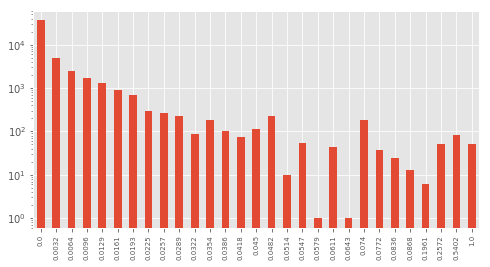

In [293]:
f = 'Var23'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

In [290]:
f = 'Var22'
csv[f] = csv_org[f]
csv = csv.drop(f, axis=1)

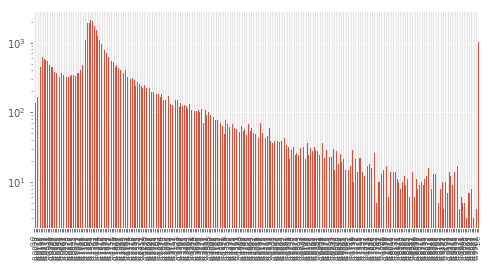

In [285]:
f = 'Var21'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,csv[f].quantile(0.98))
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

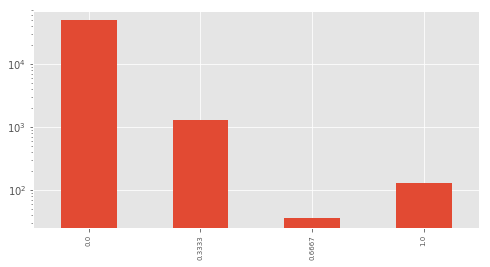

In [280]:
f = 'Var19'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: 0.0
max: 948.0
nans: 0
unique: 26
val_type: <class 'numpy.float64'>
vals per class: 1923.08


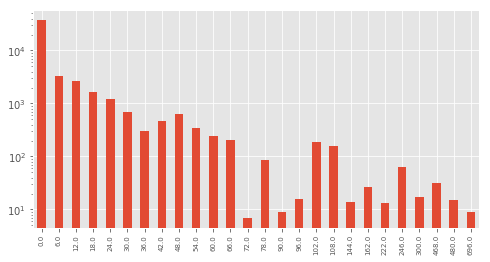

In [278]:
f = 'Var18'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
stat(f)
csv[f] = cast(csv[f],-100,696)
plot(csv[f].sort_values(),small=True)

min: 0.0
max: 1220.0
nans: 0
unique: 37
val_type: <class 'numpy.float64'>
vals per class: 1351.35


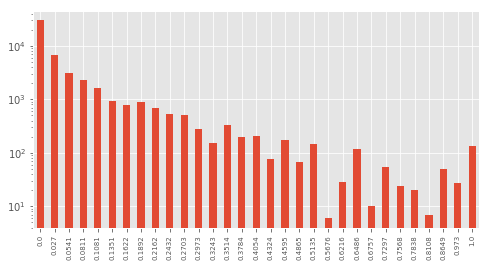

In [275]:
f = 'Var17'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
stat(f)
csv[f] = cast(csv[f],-100,185)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: 0.0
max: 434.92
nans: 0
unique: 597
val_type: <class 'numpy.float64'>
vals per class: 83.75


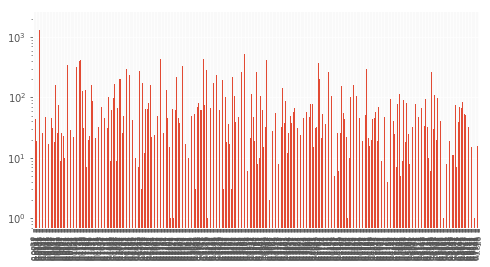

In [271]:
f = 'Var16'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
stat(f)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

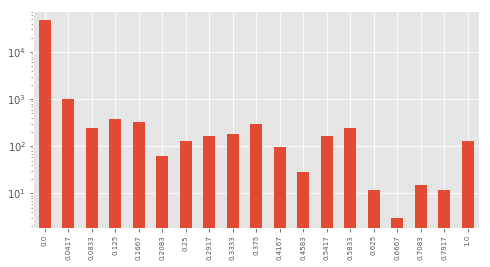

In [268]:
f = 'Var14'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

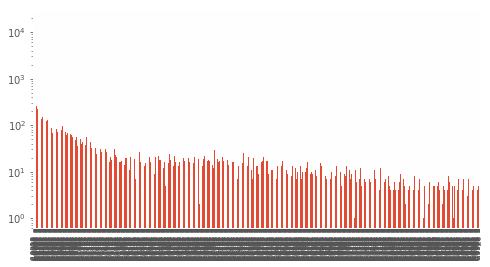

In [254]:
f = 'Var13'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,5000)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

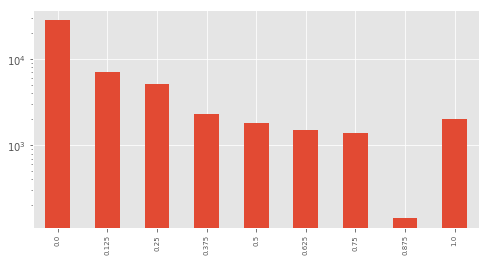

In [263]:
f = 'Var12'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = cast(csv[f],-100,64)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

min: 8.0
max: 40.0
nans: 48760
unique: 6
val_type: <class 'numpy.float64'>
vals per class: 206.67


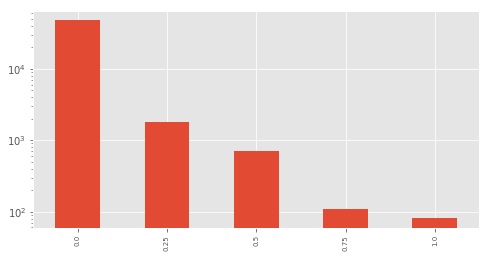

In [261]:
f = 'Var11'
stat(f)
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(method='bfill')
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

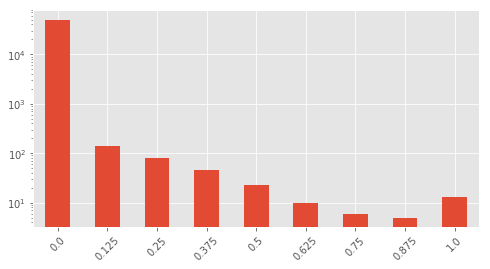

In [137]:
f = 'Var1'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,64)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

True


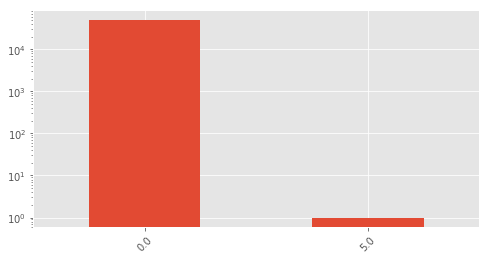

In [138]:
f = 'Var2'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
plot(csv[f].sort_values(),small=True)
one_hot_encoding(f)

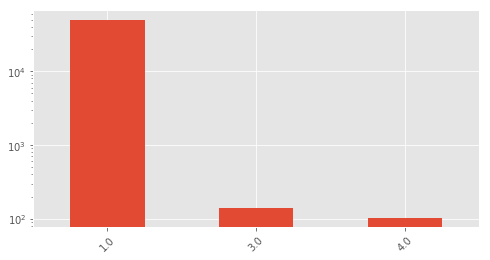

In [139]:
f = 'Var3'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = threshold_factorization(csv[f],1000,100,1)
plot(csv[f].sort_values(),sort=True,small=True)
one_hot_encoding(f)

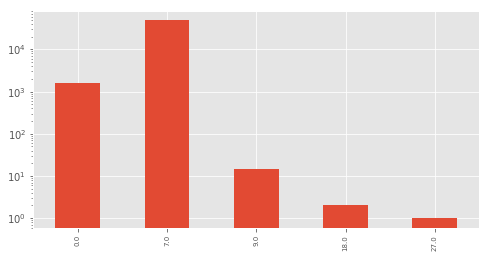

In [196]:
f = 'Var4'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(7)
# csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

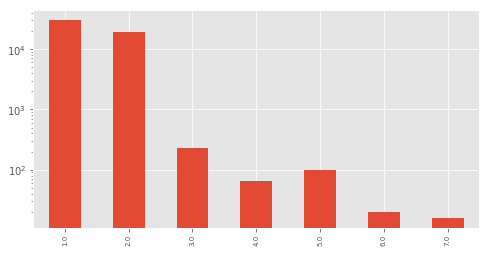

In [194]:
f = 'Var5'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = threshold_factorization(csv[f],1000,7,5,4,2,1)
plot(csv[f].sort_values(),small=True)
binary_encoding(f)

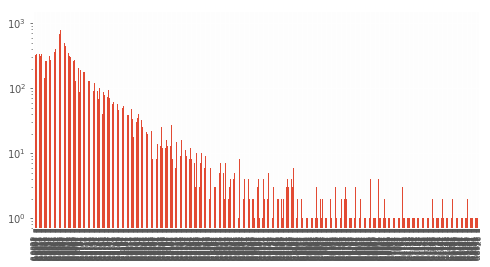

In [186]:
f = 'Var6'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

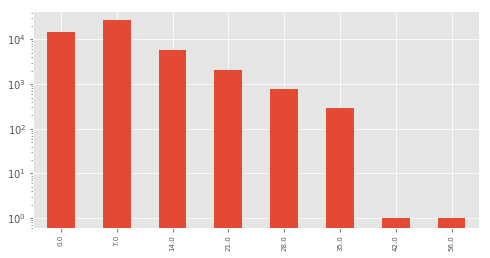

In [185]:
f = 'Var7'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].mode(dropna = True)[0])
csv[f] = cast(csv[f],-100,56)
# csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

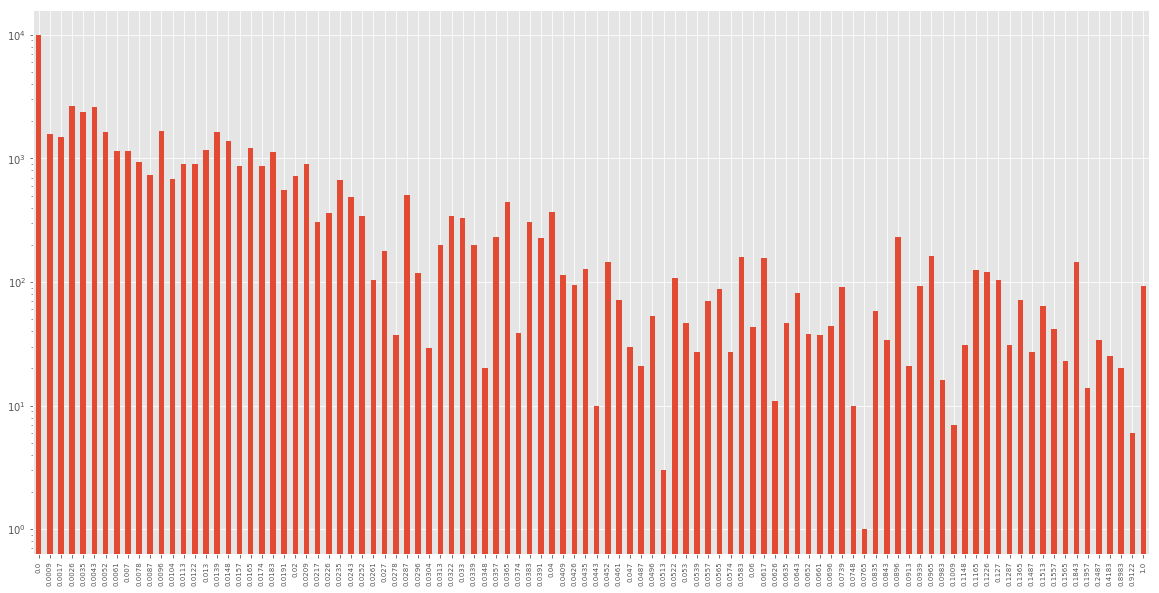

1.0

In [198]:
f = 'Var9'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(method='ffill')
csv[f] = csv[f].fillna(csv[f].median())
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

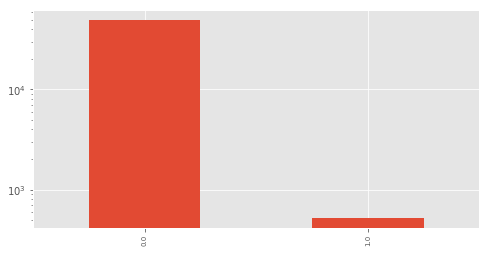

In [205]:
f = 'Var10'
csv[f] = csv_org[f]
csv[f] = csv[f].fillna(csv[f].median())
csv[f] = threshold_factorization(csv[f],1)
csv[f] = standarize(csv[f])
plot(csv[f].sort_values(),small=True)

AttributeError: 'DataFrame' object has no attribute 'unique'

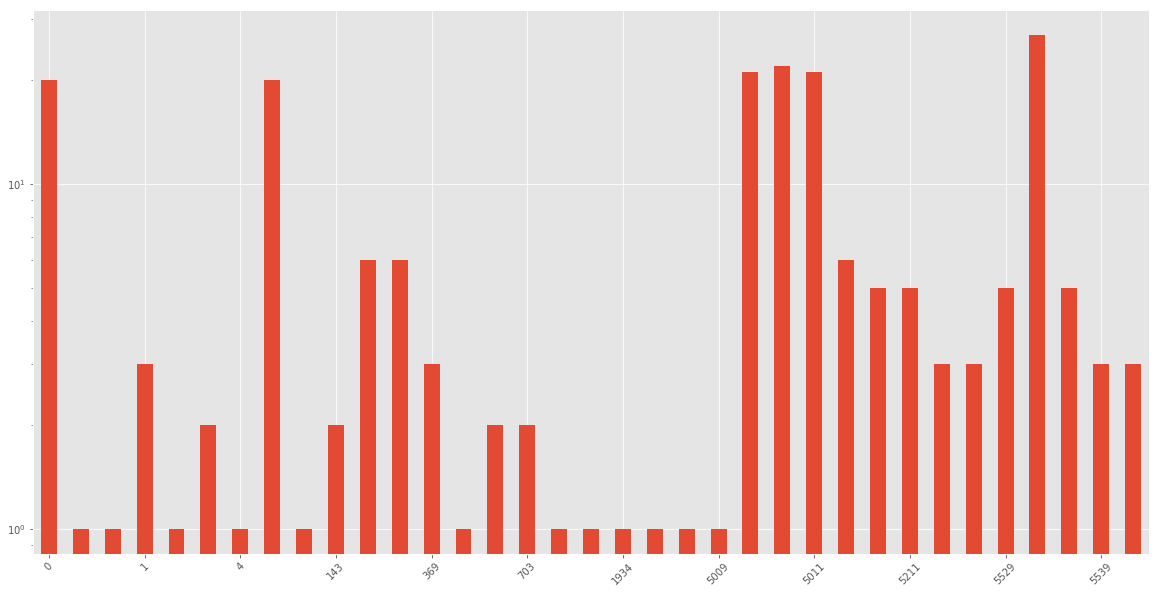

In [59]:
plot(nans.sort_values())

In [217]:
val_type.to_csv(r'C:\Users\Mateusz\Desktop\val_types.txt', header=None, index=None, sep=' ', mode='a')

C:\Users\Mateusz\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:

# print(unique.sort_values().values)
# print(nans.values)